In [1]:
import pandas as pd
import seaborn as sns

In [2]:
# In this example, you will be parsing some tweets about stock prices

tweets = pd.read_csv('data/so_many_tweets.csv')


In [3]:
first_tweet = tweets['Text'][0]         # first tweet in the dataset
words_in_tweet = first_tweet.split(' ') # a list of words in tweet
for word in words_in_tweet:             # for each word in the list
    if "$" in word:
        print ("THIS TWEET IS ABOUT", word)


THIS TWEET IS ABOUT $TWTR
THIS TWEET IS ABOUT $AAPL


In [4]:
words_in_tweet


['RT',
 '@j_o_h_n_danger:',
 '$TWTR',
 'now',
 'top',
 'holding',
 'for',
 'Andor,',
 'unseating',
 '$AAPL',
 'http://t.co/vPrx4mUONZ']

In [5]:
# A dataset that shows the relationship between the money spent in the categories of TV,radio, and newspaper.

%matplotlib inline
data = pd.read_csv('data/Advertising.csv', index_col=0)
data.head()


,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


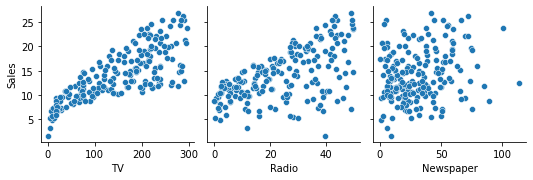

In [6]:
#If we plot each variable against sales, we get the following graphs

sns.pairplot(data, x_vars=['TV','Radio','Newspaper'], y_vars='Sales')


In [7]:
# Scraping indeed.com with BeautifulSoup
# (source: https://medium.com/codex/web-scraping-with-beautifulsoup-66a3a2b3b60)

# In this example, you will "scrape" (taken from the Web) job descriptions for companies 
# in Pasig actively hiring data scientists. 

import requests
import bs4
from bs4 import BeautifulSoup
import pandas as pd

url_temp= "https://ph.indeed.com/jobs?q={}&l={}&start={}"
base_link="https://ph.indeed.com"
headers = {"User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/70.0.3538.77 Safari/537.36"}
def get_href(url_temp,position,city):
    results_per_city=200
    href_list=[]
    for start in range(0,results_per_city+10,10):
        url=url_temp.format(position,city,start)
        r=requests.get(url,headers=headers)
        soup=BeautifulSoup(r.text,"html.parser")    
       
        for i in soup.find_all('a'):
            # if tag has attribute of class
            if i.has_attr( "href" ):
                k=i['href']
                href_list.append(base_link+k)
    
    return href_list
  
def get_job_links(href_list):
    job_links=[]
    for a in href_list:
        if a.find('/rc/clk')!=-1:
            job_links.append(a)
        elif a.find('/company/')!=-1:
            job_links.append(a)
    return job_links
  
def get_job_df(job_links,city):
    df=pd.DataFrame(columns=["job_location", "job_title", "company", "job_description"])
    
    for i in job_links:
        req=requests.get(i,headers=headers)
        soup_req=BeautifulSoup(req.text,"html.parser")
        try:
            title=soup_req.find('h1',{'class': 'icl-u-xs-mb--xs icl-u-xs-mt--none jobsearch-JobInfoHeader-title'}).text
        except:
            continue
        try:
            company=soup_req.find('div',{'class':'icl-u-lg-mr--sm icl-u-xs-mr--xs'}).text
        except:
            continue
        try:
            location=soup_req.find('div',{'class':'jobsearch-InlineCompanyRating icl-u-xs-mt--xs jobsearch-DesktopStickyContainer-companyrating'}).text
        except:
            location=city
        try:
            desc=soup_req.find('div',{'class':'jobsearch-jobDescriptionText'}).text
        except:
            continue
        df = df.append({"job_location":city, "job_title":title, "company":company, "job_description":desc},
                       ignore_index=True)
    
    return df
  
def get_job_postings(url_temp,position,city):
    
    href_list= get_href(url_temp,position,city)
    
    job_links= get_job_links(href_list)
    
    job_df= get_job_df(job_links,city)
    
    return job_df

data_scientist_df= get_job_postings(url_temp,position='Data+Scientist',city='Pasig')
data_scientist_df.head(10)

,job_location,job_title,company,job_description
0,Pasig,Data Scientist,,"Talent. Technology. Trust.Join our team, and g..."
1,Pasig,Data Scientist- Shared Services (Night Shift),,"PSB Technology Services, Inc. is a Manila-base..."
2,Pasig,Data Scientist,,Theoria Medical is a comprehensive medical gro...
3,Pasig,Marketing Data Scientist,,"You will help write queries and run reports, b..."
4,Pasig,Data Scientist,,Company ProfileWe are an Australian company in...
5,Pasig,Data Scientist (Bootcamp),,Job Description\n\nA Data Scientist(CL1) shoul...
6,Pasig,Data Scientist,,"We’re JTI, Japan Tobacco International and we ..."
7,Pasig,Data Scientist / Scientist Data,,Position: Data ScientistSection / DivisionData...
8,Pasig,Data Scientist,,"Preamble\n\nThe Analytics Team, which is part ..."
9,Pasig,Data Scientist,,JOB DESCRIPTION\nJOB\nSUMMARY\n\nResponsible f...


In [8]:
# The goal here is to look at some of the most
# common keywords people use in their job descriptions.

from sklearn.feature_extraction.text import CountVectorizer
# used to count number of words and phrases

texts = data_scientist_df['job_description'].to_list()

vect = CountVectorizer(ngram_range=(1,2), stop_words='english')
# make a count vectorizer to get basic counts

matrix = vect.fit_transform(texts)
# fit and learn to the vocabulary in the corpus

print (len(vect.get_feature_names()))  # how many features are there

freqs = [(word, matrix.getcol(idx).sum()) for word, idx in vect.vocabulary_.items()]
#sort from largest to smallest
for phrase, times in sorted (freqs, key = lambda x: -x[1])[:25]:
    print (phrase, times)
    
    
    

25772
data 1423
business 564
experience 542
analytics 360
team 353
work 344
science 307
skills 269
learning 223
data science 217
tools 203
models 184
analysis 179
using 178
knowledge 170
management 168
machine 163
years 160
role 159
machine learning 159
marketing 157
working 153
client 150
strong 149
ability 146


In [35]:

import pandas as pd
# read in the CSV file from a URL
drinks = pd.read_csv('data/drinks.csv')
# examine the data's first five rows
drinks.head() # print the first 5 rows

# Determine if qualitative or quantitative

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU
2,Algeria,25,0,14,0.7,AF
3,Andorra,245,138,312,12.4,EU
4,Angola,217,57,45,5.9,AF


In [37]:
drinks['continent'].describe()

count     170
unique      5
top        AF
freq       53
Name: continent, dtype: object

In [38]:
drinks['beer_servings'].describe()

count    193.000000
mean     106.160622
std      101.143103
min        0.000000
25%       20.000000
50%       76.000000
75%      188.000000
max      376.000000
Name: beer_servings, dtype: float64

In [39]:
# notice the difference between drinks['continent'].describe() and drinks['beer_servings'].describe()

In [42]:
# Measures of center

import numpy
results = [5, 4, 3, 4, 5, 3, 2, 5, 3, 2, 1, 4, 5, 3, 4, 4, 5, 4, 2, 1,
4, 5, 4, 3, 2, 4, 4, 5, 4, 3, 2, 1]
sorted_results = sorted(results)
print (sorted_results)
'''
[1, 1, 1, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4,
4, 4, 5, 5, 5, 5, 5, 5, 5]
'''
print (numpy.mean(results)) # == 3.4375
print (numpy.median(results)) # == 4.0

[1, 1, 1, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5]
3.4375
4.0


In [44]:
import numpy
temps = [31, 32, 32, 31, 28, 29, 31, 38, 32, 31, 30, 29, 30, 31, 26]
print (numpy.mean(temps)) # == 30.73
print (numpy.median(temps)) # == 31.0

30.733333333333334
31.0


In [48]:
# Standard deviation

mean = numpy.mean(temps) # == 30.73
squared_differences = []
# empty list o squared differences
for temperature in temps:
    difference = temperature - mean
    # how far is the point from the mean
    squared_difference = difference**2
    # square the difference
    squared_differences.append(squared_difference)
    # add it to our list
average_squared_difference = numpy.mean(squared_differences)
# This number is also called the "Variance"
standard_deviation = numpy.sqrt(average_squared_difference)
print (standard_deviation) # == 2.5157

2.5157283018817607
